In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('post-election-violence-data.csv')
df.drop(0, inplace=True)

In [3]:
df['event_date'] = pd.to_datetime(df['event_date'])
df.index = df['event_date']

In [4]:
df['fatalities'] =df['fatalities'].apply(lambda num: int(num))

In [5]:
df2013 =df.loc['2013-12-31':'2013-01-01']

In [6]:
df2013.groupby(df2013['event_type'])['fatalities'].sum()

event_type
Battles                       249
Explosions/Remote violence     36
Protests                        0
Riots                          86
Strategic developments          0
Violence against civilians    399
Name: fatalities, dtype: int64

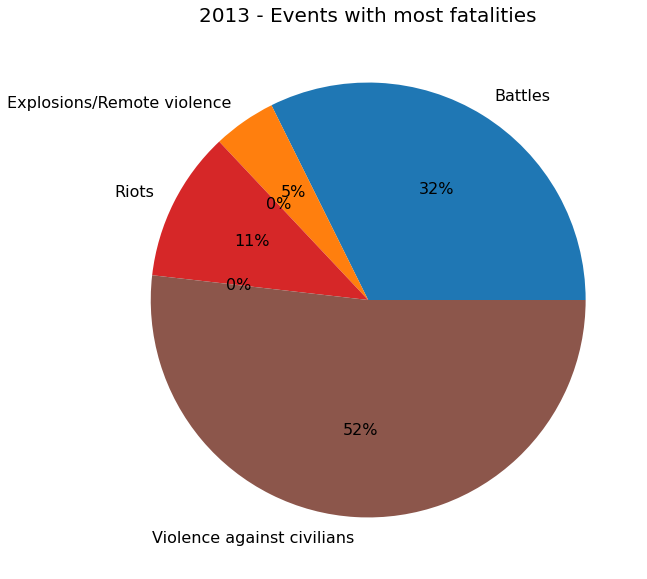

In [7]:
df2013.groupby(df2013['event_type'])['fatalities'].sum().plot.pie(autopct='%1.0f%%', figsize=(14,10), fontsize=16) 
title = '2013 - Events with most fatalities'
plt.title(title, fontsize=20)
plt.ylabel(' ')
#Save Image
plt.savefig(title, dpi=1000, facecolor='w')

In [8]:
df2013.groupby([df2013['event_type'], df2013['sub_event_type']])['fatalities'].sum()

event_type                  sub_event_type                    
Battles                     Armed clash                           249
Explosions/Remote violence  Grenade                                22
                            Remote explosive/landmine/IED          14
Protests                    Excessive force against protesters      0
                            Peaceful protest                        0
                            Protest with intervention               0
Riots                       Mob violence                           71
                            Violent demonstration                  15
Strategic developments      Change to group/activity                0
                            Disrupted weapons use                   0
                            Looting/property destruction            0
                            Other                                   0
Violence against civilians  Abduction/forced disappearance          0
                           

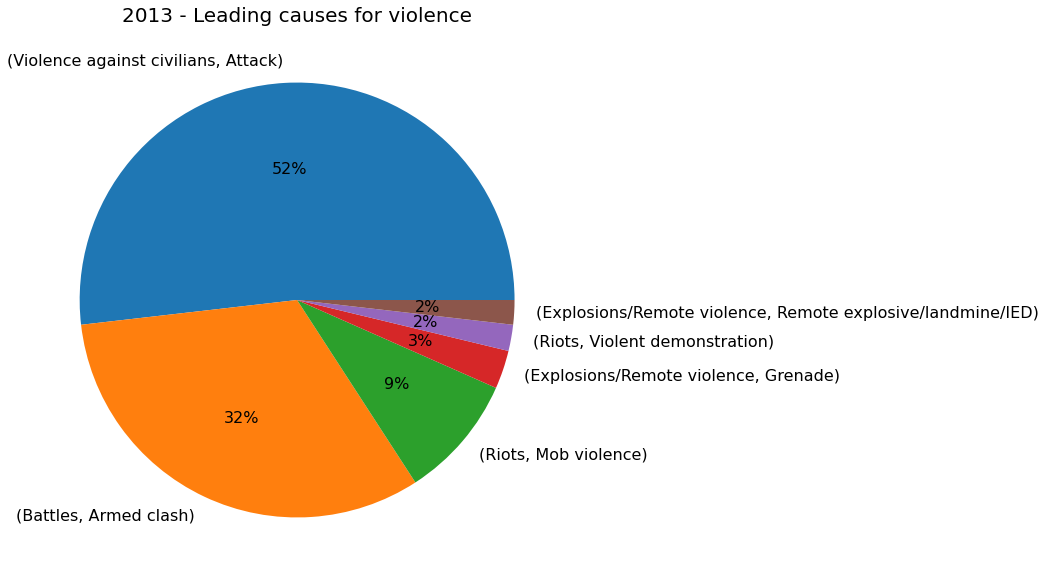

In [13]:
df2013.groupby([df2013['event_type'], df2013['sub_event_type']])['fatalities'].sum().sort_values(ascending=False)[:6].plot.pie(autopct='%1.0f%%',figsize=(14,10), fontsize=16) 
title = '2013 - Leading causes for violence'
plt.title(title, fontsize=20)
plt.ylabel(' ')
#Save Image
plt.savefig(title, dpi=1000, facecolor='w')

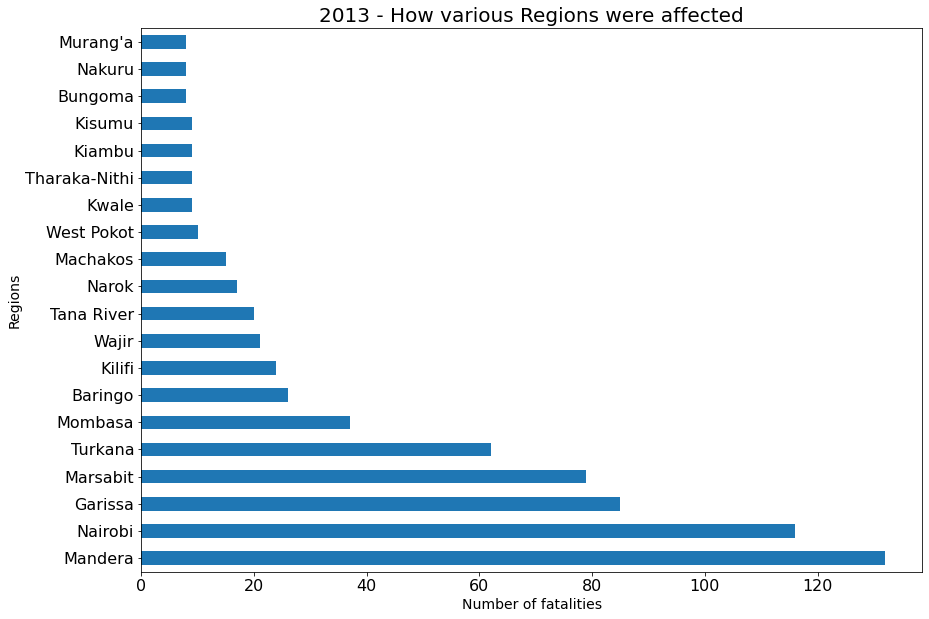

In [10]:
df2013.groupby(df2013['admin1'])['fatalities'].sum().sort_values(ascending=False)[:20].plot(kind='barh', figsize=(14,10), fontsize=16)
title = '2013 - How various Regions were affected'
plt.title(title, fontsize=20)
plt.ylabel('Regions',fontsize=14)
plt.xlabel('Number of fatalities',fontsize=14)
#Save Image
plt.savefig(title, dpi=1000, facecolor='w')

In [11]:
regions = df2013.groupby([df2013['admin1'],df2013['sub_event_type']])['fatalities'].sum()


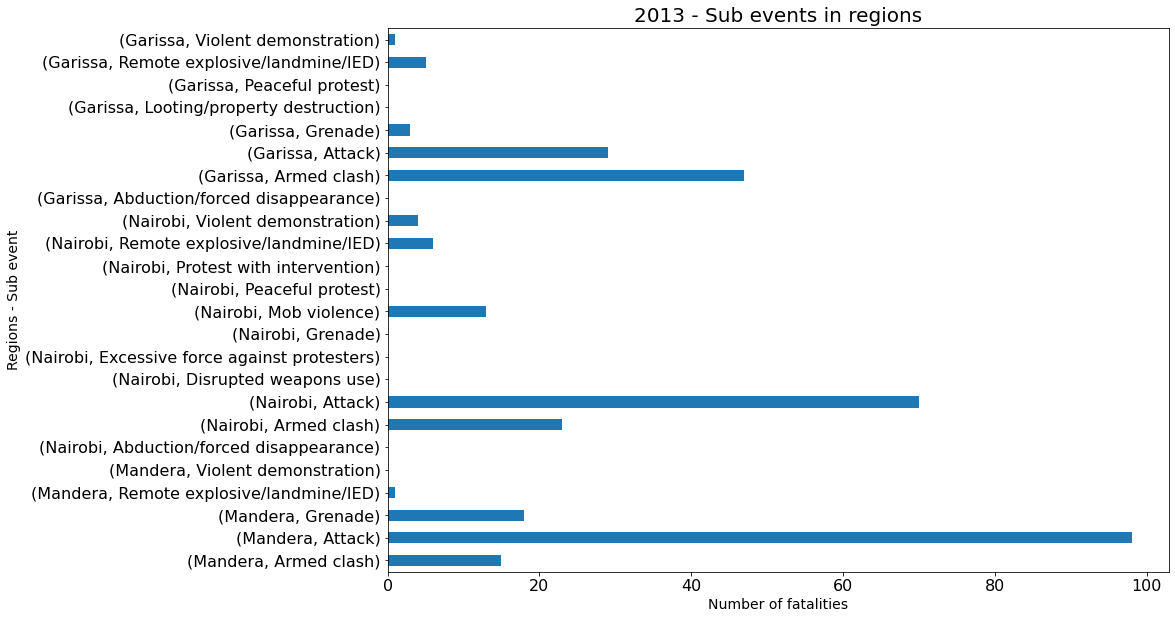

In [14]:
regions[['Mandera', 'Nairobi', 'Garissa']].plot(kind='barh', figsize=(14,10),fontsize=16)
title = '2013 - Sub events in regions'
plt.title(title, fontsize=20)
plt.ylabel('Regions - Sub event', fontsize=14)
plt.xlabel('Number of fatalities', fontsize=14)
#Save Image
plt.savefig(title, dpi=1000, facecolor='w')